# Loading Datasets

In [71]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("data/Data_Train.xlsx", engine="openpyxl")
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5602,IndiGo,1/04/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6284
7702,Air India,6/06/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info,10991
3374,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BOM → COK,13:00,04:25 22 Mar,15h 25m,1 stop,In-flight meal not included,7438
2222,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,23:05,19:45 07 Mar,20h 40m,1 stop,No info,17024
8337,GoAir,9/06/2019,Delhi,Cochin,DEL → HYD → COK,07:30,13:35,6h 5m,1 stop,No info,6276


# Data inspection

In [72]:
df.shape # shape of the DataFrame (row, columns)

(10683, 11)

In [73]:
df.isnull().any() # checks if the DataFrame columns contains the null value of not

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [74]:
df.isna().sum() # gives total number of missing values(null) in the columns

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [75]:
df.isna().sum() / len(df) # gives percentage of the missing values of the columns

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [76]:
df.dropna(inplace=True) # since only 2 rows contains missing values so deleting the rows which contains the missing values
df.reset_index(inplace=True, drop=True) # resetting index of the dataframe as index from the middle is dropped

In [77]:
df.isnull().any() # after deleting checking the missing value if there is any

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [78]:
df.dtypes # checking the datatypes of all the columns

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [79]:
df.info() # checking the info of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [80]:
df.describe() # overview of the numerical data

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [81]:
df.describe(include="object") # overview of the categorical data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


In [82]:
df.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8756,Vistara,18/05/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,18:50 19 May,25h 50m,1 stop,No info,9555
1971,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 11 May,29h 20m,2 stops,No info,15129


In [83]:
day = []
month = []
for date in df["Date_of_Journey"]: # looping through date_of_journey to get day and month
    list_date = date.split("/") # splitting the date using "/" to get the form of ["9", "05", "2019"]
    day.append(list_date[0]) # appending 0 index data to day 
    month.append(list_date[1]) # appending 1 index data to month list

# month

In [84]:
df["Day"] = day # inserting day columns 
df["Month"] = month # inserting month columns in the dataframe

In [85]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [86]:
df.drop("Date_of_Journey", axis=1, inplace=True) # deleting Date of journey columns form the dataframe

In [87]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05


In [88]:
# Extracting hour and minute from the Departure time (Dep_Time) from the dataframe and dumping it in new columns (Dep_Hour, Dep_Minute)
dep_hrs = []
dep_min = []
for time in df["Dep_Time"]:
    # print(time)
    list_time = time.split(":")
    # print(list_time)
    dep_hrs.append(list_time[0])
    dep_min.append(list_time[1])
# dep_hrs
# dep_min

In [89]:
# Adding columns Dep_Hours and Dep_Minute in the DataFrame
df["Dep_Hours"] = dep_hrs
df["Dep_Minutes"] = dep_min

In [90]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,05,50


In [91]:
# Deleting Dep_Time columns from the dataframe
df.drop("Dep_Time", axis="columns", inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,05,50


In [92]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                object
Month              object
Dep_Hours          object
Dep_Minutes        object
dtype: object

In [93]:
# Extracting hour and minute from the Arrival time (Arrival_Time) from the dataframe and dumping it in new columns (Arrival_Hour, Arrival_Minute)
df["Arrival_Hour"] = pd.DatetimeIndex(df["Arrival_Time"]).hour
df["Arrival_Minute"] = pd.DatetimeIndex(df["Arrival_Time"]).minute
df.drop("Arrival_Time", axis=1, inplace=True)

In [94]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,09,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [95]:
# converting Duration in the format with out alphabets 
td = pd.to_timedelta(df["Duration"])
td

0       0 days 02:50:00
1       0 days 07:25:00
2       0 days 19:00:00
3       0 days 05:25:00
4       0 days 04:45:00
              ...      
10677   0 days 02:30:00
10678   0 days 02:35:00
10679   0 days 03:00:00
10680   0 days 02:40:00
10681   0 days 08:20:00
Name: Duration, Length: 10682, dtype: timedelta64[ns]

In [96]:
# extracting duration hour and duration minute from the time delta(td)
dur_hr = []
dur_min = []
for i in range(len(td)): # loop using the length of timedelta
    seconds = td[i].seconds  # taking out the time in the format of seconds 
    minutes = seconds / 60  # total minutes in the duration
    hour = minutes // 60 #  # converting minutes in hours with the help of floor division
    minute = minutes % 60 # # minutes
    dur_hr.append(hour)  # appending the hour in duration hour list
    dur_min.append(minute) # appending the minute in duration minute list

dur_min[:5]

[50.0, 25.0, 0.0, 25.0, 45.0]

In [97]:
# Adding new column in the dataframe Duration_Hour and Duration_Minute
df["Duration_Hour"] = dur_hr
df["Duration_Minute"] = dur_min

In [98]:
# converting datatype of the columns in the int format using astype method
df[["Day", "Month", "Dep_Hours", "Dep_Minutes", "Duration_Hour", "Duration_Minute"]] = df[["Day", "Month", "Dep_Hours", "Dep_Minutes", "Duration_Hour", "Duration_Minute"]].astype("int32")

In [99]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [100]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Dep_Hours           int32
Dep_Minutes         int32
Arrival_Hour        int32
Arrival_Minute      int32
Duration_Hour       int32
Duration_Minute     int32
dtype: object

In [101]:
# dropping Duration columns from the dataframe as hour and minute are already extracted from the duration
df.drop("Duration", axis=1, inplace=True)

In [102]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [138]:
# Working with the duration column
l_route = []
route_1 = []
route_2 = []
route_3 = []
route_4 = []
route_5 = []
route_6 = []
for i in range(len(df["Route"])):
    item = df["Route"][i]
    list = item.split("→")
    l_route.append(len(list))
    
    if j < len(list):
        dir = list[j]
        route_1.append()
                
    else:
        route_.append(float("Nan"))
                
            
    # df
    # l_route.append(len(list))

SyntaxError: invalid syntax (3770191316.py, line 17)

In [104]:
# df["Route"] = l_route
# df.head(2)

In [105]:
# REplacing categorical data of Total_stops with numerical value
df.replace(["non-stop", "1 stop", "2 stops", "3 stops", "4 stops"], [0, 1, 2, 3 ,4], inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [106]:
# Working with Total stops columns in the dataframe
# df["Total_Stops"].unique()

In [107]:
# mapping Total stops value with numerical values
# stop_mapping = {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
# df["Total_Stops"] = df["Total_Stops"].str.strip().map(stop_mapping)
# df.head(2)

In [108]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# EDA (Exploratory Data Analysis)

<Axes: xlabel='Additional_Info', ylabel='count'>

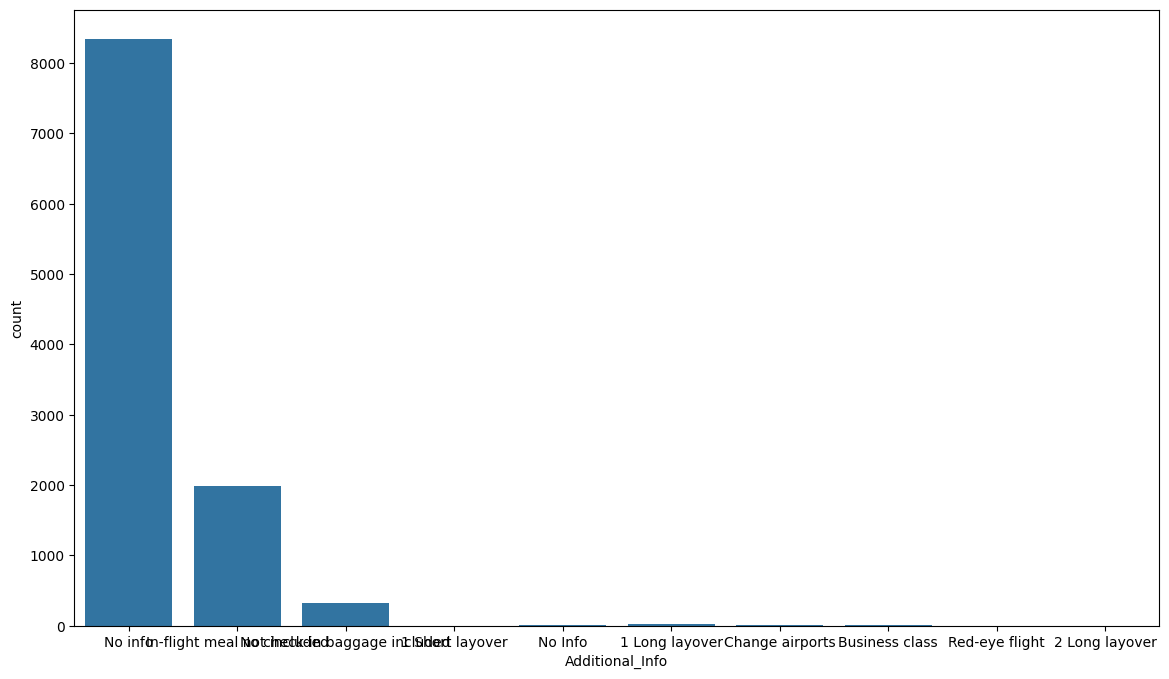

In [109]:
plt.figure(figsize=(14, 8))
sns.countplot(x="Additional_Info", data=df)

In [110]:
df.groupby(["Total_Stops"], as_index=False).Price.mean()

,Total_Stops,Price
0,0,5024.900315
1,1,10594.123556
2,2,12715.807895
3,3,13112.000000
4,4,17686.000000


<Axes: xlabel='Total_Stops', ylabel='count'>

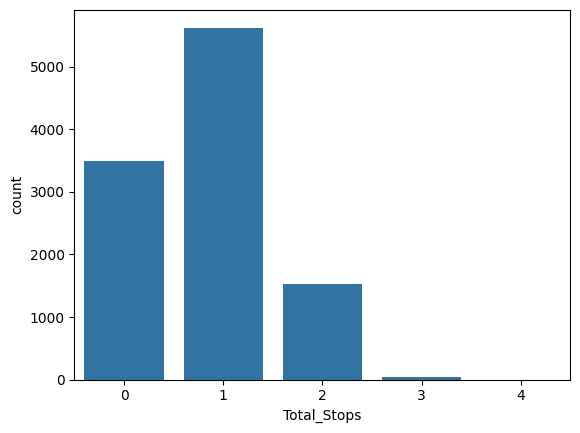

In [111]:
sns.countplot(x=df["Total_Stops"])

In [112]:
df.corr(numeric_only=True)

,Total_Stops,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.594057,-0.136706
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.452643,-0.124855
Day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.013416,-0.008940
Month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.046494,-0.040897
Dep_Hours,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.011526,-0.023707
Dep_Minutes,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.025085,0.092485
Arrival_Hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.012782,-0.118309
Arrival_Minute,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.128140,0.151628
Duration_Hour,0.594057,0.452643,-0.013416,0.046494,0.011526,-0.025085,-0.012782,-0.128140,1.000000,-0.149376
Duration_Minute,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.149376,1.000000


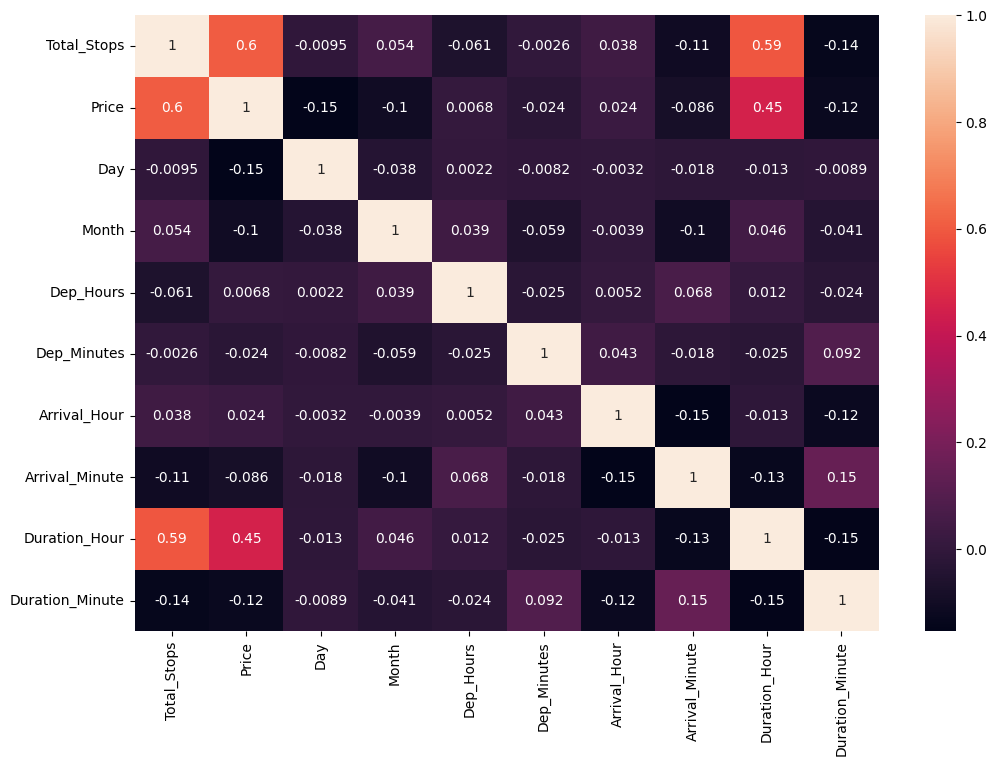

In [113]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

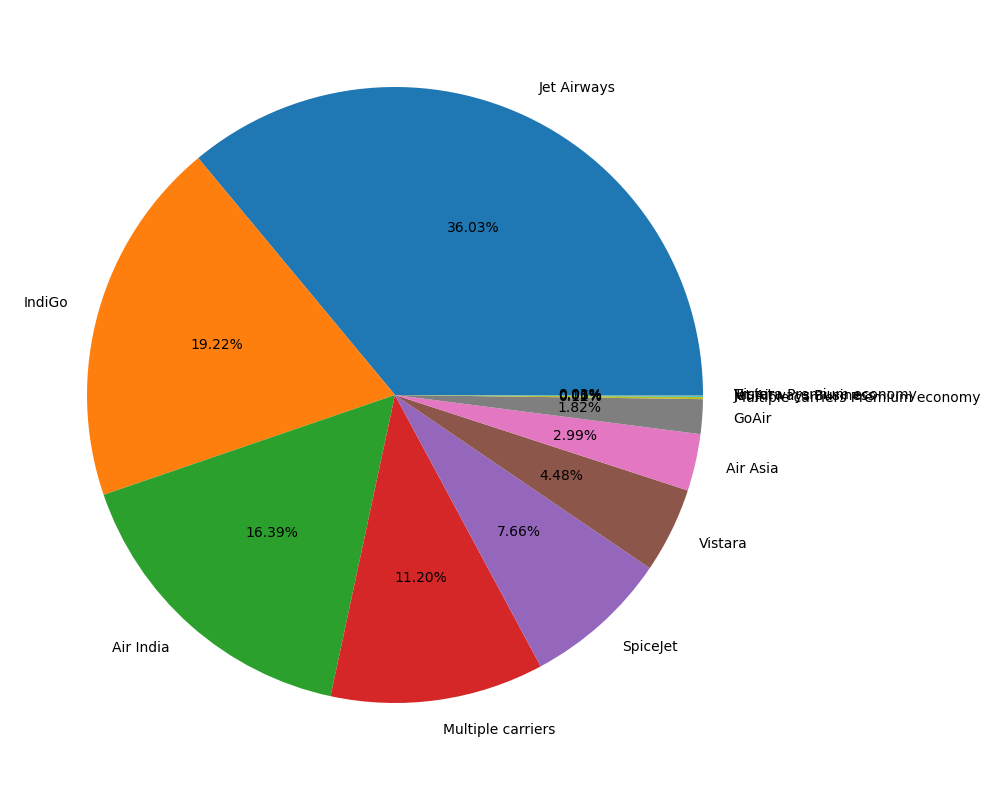

In [114]:
s = df.Airline.value_counts()
plt.figure(figsize=(14, 10))
plt.pie(s.values, labels=s.index, autopct="%.2f%%")
plt.show()

<Axes: xlabel='Duration_Hour', ylabel='count'>

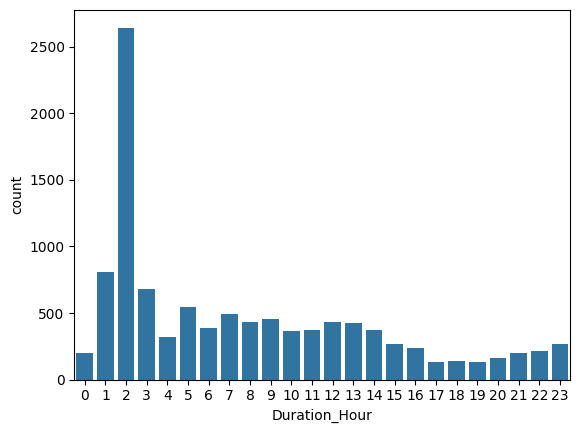

In [115]:
sns.countplot(x="Duration_Hour", data=df)

<Axes: xlabel='Dep_Hours', ylabel='Count'>

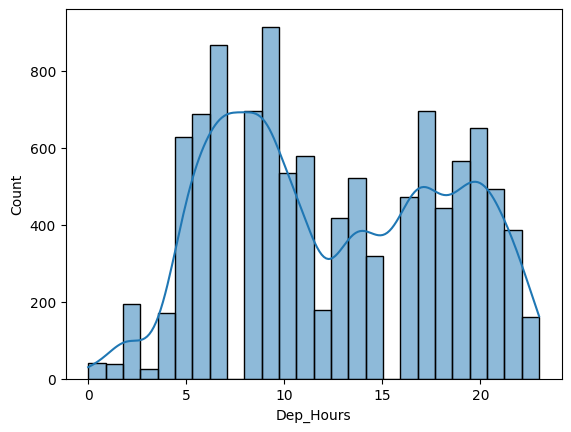

In [116]:
sns.histplot(df["Dep_Hours"], kde=True)

<Axes: xlabel='Dep_Minutes', ylabel='Count'>

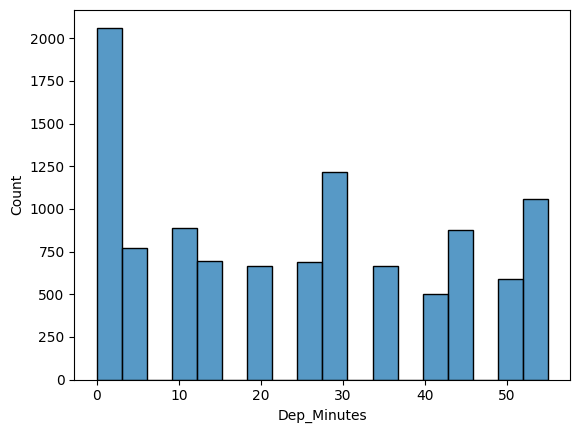

In [117]:
sns.histplot(df["Dep_Minutes"])

<Axes: ylabel='Total_Stops'>

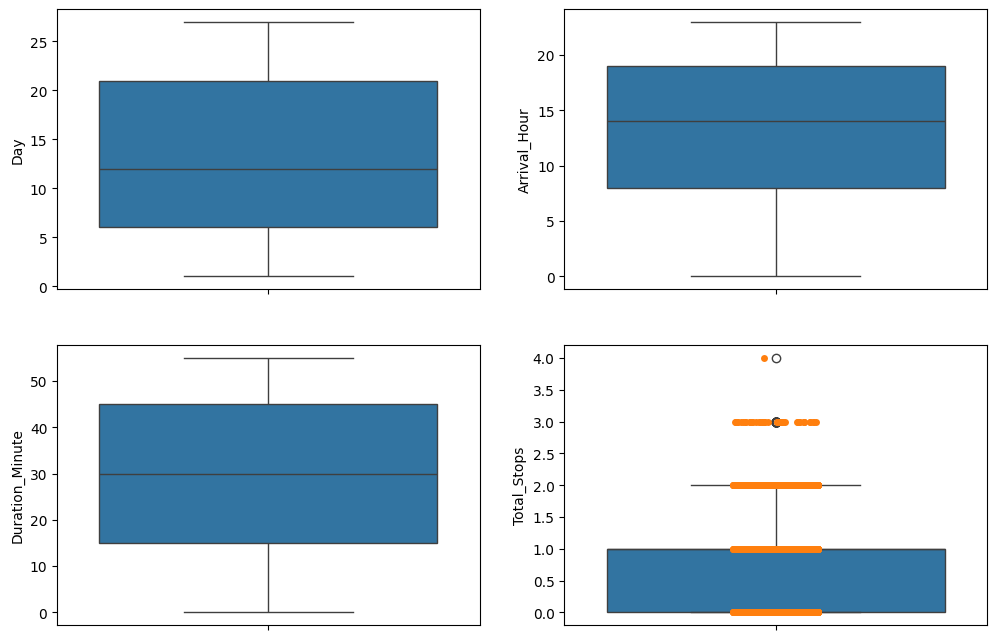

In [118]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(df["Day"])

plt.subplot(2, 2, 2)
sns.boxplot(df["Arrival_Hour"])

plt.subplot(2, 2, 3)
sns.boxplot(df["Duration_Minute"])

plt.subplot(2, 2, 4)
sns.boxplot(df["Total_Stops"])
sns.stripplot(df["Total_Stops"])

In [119]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25


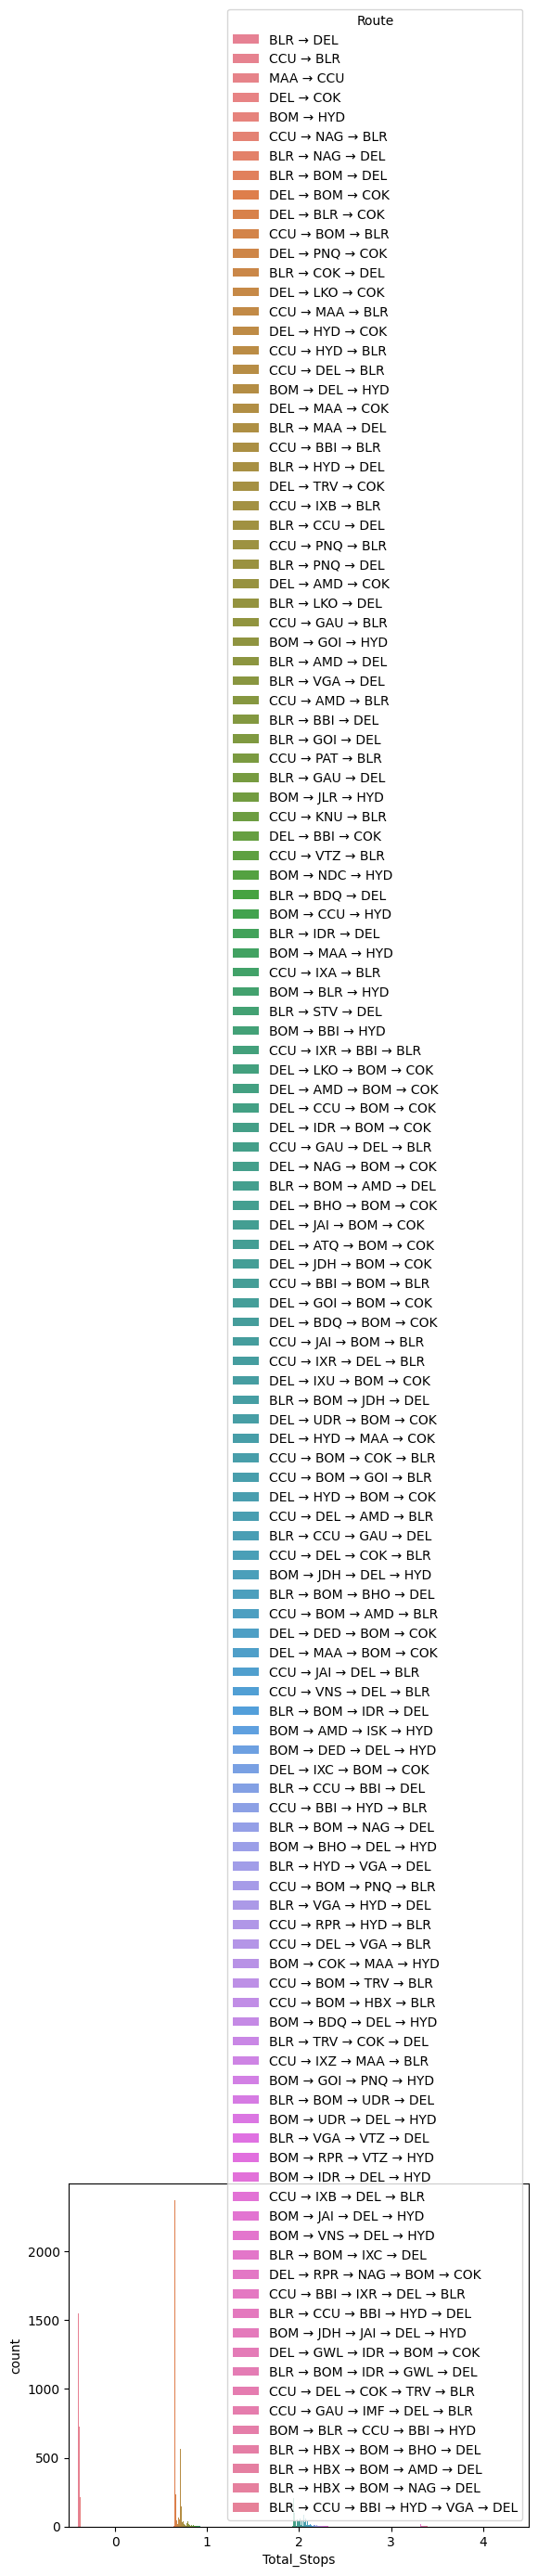

In [120]:
# Is there any relation between 
sns.countplot(x="Total_Stops", hue="Route", data=df)
plt.show()

<Axes: ylabel='Route'>

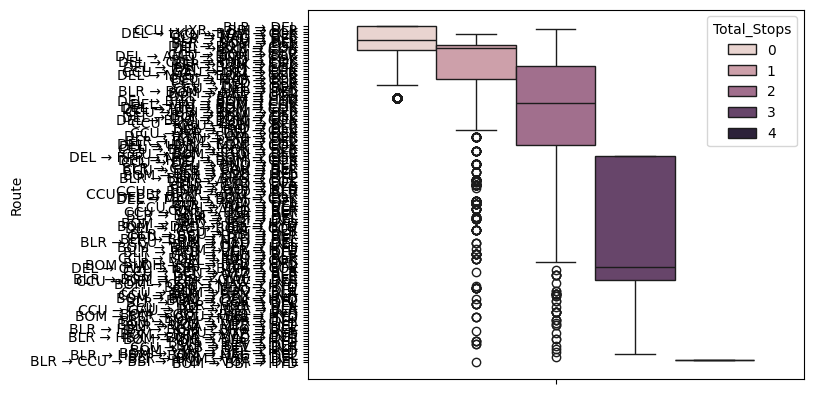

In [121]:
sns.boxplot(y="Route", hue="Total_Stops", data=df)

# Train Test Split

In [122]:
# Feature selection
y = df["Price"]
df.drop("Price", axis=1, inplace=True)

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
# X_train
# X_test
# y_train
# y_test

In [124]:
X_train_data = X_train[["Route", "Total_Stops", "Duration_Hour", "Duration_Minute"]].values
X_test_data = X_test[["Route", "Total_Stops", "Duration_Hour", "Duration_Minute"]].values

# X_train_data
# X_test_data

# Model Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_data, y_train)

ValueError: could not convert string to float: 'CCU → DEL → BLR'

In [ ]:
# coef_
m = model.coef_
m

In [ ]:
# intercept_
c = model.intercept_
c

In [ ]:
# y_predicted value
y_pred = model.predict(X_test_data)
y_pred[:5]

In [ ]:
X_test_data[0]

In [ ]:
price = c + m[0] * df["Route"] + m[1] * df["Total_Stops"] + m[2] * df["Duration_Hour"] + m[3] * df["Duration_Minute"]
price

In [ ]:
df.head(2)

In [ ]:
sns.regplot(x="Route", y=y, data=df)
sns.regplot(x="Route", y=price, data=df)

In [ ]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual value")
sns.distplot(y_pred, hist=False, color="b", label="fitted values", ax=ax1)

In [ ]:
model.predict([[2, 4, 22, 4]])

In [129]:
list = [float("Nan")]
print(list)

[nan]


In [137]:
route_1 = 0
for i in range(2):
    route_i.append("Hello")

NameError: name 'route_i' is not defined